# Estadística Aplicada

## Alan Fernando Del Real Almaguer

### 8va Sesión 23 de Febrero 2023.

In [5]:
# importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lifelines
%matplotlib inline
from lifelines.datasets import load_rossi
rossi = load_rossi()

In [6]:
# mostramos el dataset
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [ ]:
# El tiempo de supervivencia en este ejemplo es el que se sale de la carcel hasta que te vuelven a arrestar (arrest).

# la variable fin es la cual se le dio apoyo económico una vez que salieron de la carcel.

In [7]:
# importamos la funcion exponencial.
from lifelines import ExponentialFitter

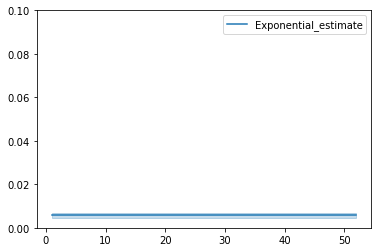

In [13]:
# graficamos la funcion de riesgo
ex1 = ExponentialFitter().fit(rossi['week'], rossi['arrest'])
ex1.plot_hazard()
plt.ylim(0, 0.1)
plt.show()

In [15]:
# riesgo para cada intervalo de tiempo
ex1.hazard_

,Exponential_estimate
1.000000,0.005755
1.118329,0.005755
1.236659,0.005755
1.354988,0.005755
1.473318,0.005755
...,...
51.526682,0.005755
51.645012,0.005755
51.763341,0.005755
51.881671,0.005755


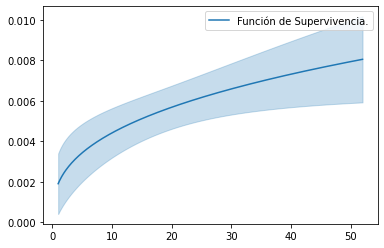

In [19]:
# probamos la funcion weibull y graficamos la funcion de riesgo
from lifelines import WeibullFitter
weibull1 = WeibullFitter().fit(rossi['week'], rossi['arrest'])
weibull1.plot_hazard(label = 'Función de Riesgo.').legend()
plt.show()

In [20]:
# creamos la funcion de riesgo
weibull1.hazard_

,Weibull_estimate
1.000000,0.001901
1.118329,0.001980
1.236659,0.002054
1.354988,0.002124
1.473318,0.002190
...,...
51.526682,0.008018
51.645012,0.008024
51.763341,0.008031
51.881671,0.008038


In [21]:
# cual es la probabilidad de ser arrestado ya pasado una semana
weibull1.hazard_at_times(1.0)

1.0    0.001901
Name: Weibull_estimate, dtype: float64

In [24]:
# riesgo de ser arrestado ya pasado un mes
weibull1.hazard_at_times(4.0)

4.0    0.003153
Name: Weibull_estimate, dtype: float64

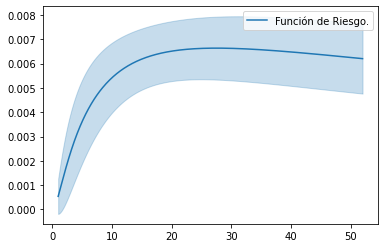

In [28]:
# probamos la funcion log-normal y graficamos
from lifelines import LogNormalFitter
logn1 = LogNormalFitter().fit(rossi['week'], rossi['arrest'])
logn1.plot_hazard(label = 'Función de Riesgo.').legend()
plt.show()

In [29]:
# creamos la tabla de riesgo
logn1.hazard_

,LogNormal_estimate
1.000000,0.000538
1.118329,0.000642
1.236659,0.000749
1.354988,0.000857
1.473318,0.000965
...,...
51.526682,0.006216
51.645012,0.006214
51.763341,0.006211
51.881671,0.006208


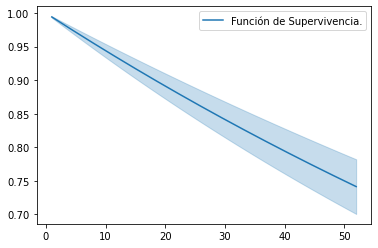

In [30]:
# graficamos la funcion de supervivencia para el modelo exponencial
ex1.plot_survival_function(label = "Función de Supervivencia.");

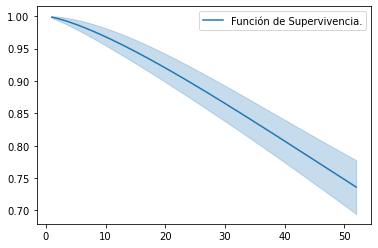

In [31]:
# graficamos la funcion de supervivencia para el modelo de weibull
weibull1.plot_survival_function(label = "Función de Supervivencia.");

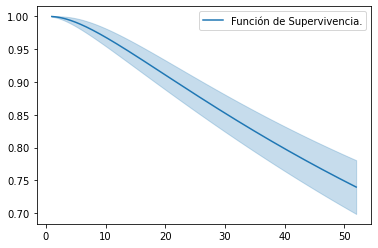

In [32]:
# graficamos la función de supervivencia para el modelo de log-normal
logn1.plot_survival_function(label = "Función de Supervivencia.");

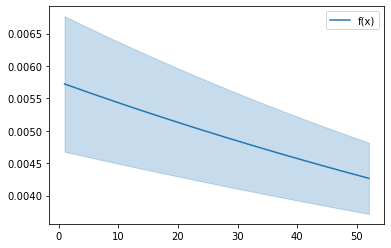

In [33]:
# graficamos la funcion de densidad de probabilidad para el modelo exponencial
ex1.plot_density(label = "f(x)");

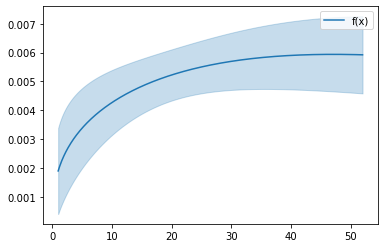

In [36]:
# graficamos al funcion de densidad de probabilidad para el modelo de weibull
weibull1.plot_density(label = "f(x)");

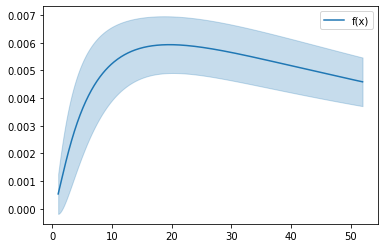

In [37]:
# graficamos la funcion de densiada de probabilidad para el modelo de log-normal
logn1.plot_density(label = "f(x)");

In [38]:
# calculamos la mediana del modelo exponencial
ex1.median_survival_time_

120.44346091357195

In [39]:
# calculamos la mediana del modelo weibull
weibull1.median_survival_time_

94.5561872278691

In [40]:
# calculamos la mediana del modelo log-normal
logn1.median_survival_time_

124.59531642094827

Para comparar y elegir el "mejor" modelo se puede usar el Criterio de Akaike (AIC).
El Criterio de Akaike (AIC) se calcula como:

$AIC = -2logL + 2k $

donde k es el número de parámetros a estimar.

Se considera que el modelo con el menor valor en el AIC, es el mejor modelo.

In [43]:
ex1.AIC_.round(), weibull1.AIC_.round(), logn1.AIC_.round()

(1406.0, 1397.0, 1400.0)

El modelo con menor criterio de Akaike (AIC) es el Weibull, por lo tanto, podemos concluir que el tiempo de supervivencia (ser liberado y despues ser arrestado) sigue una distribución de Weibull.

La mediana según el modelo de Weibull es de 94, lo que significa que el 50% de los individuos ya habían sido arrestados en la semana 94